<a href="https://colab.research.google.com/github/jjcruzado/Pytorch-Tutorial/blob/main/simple_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# iris data set
import torch
import torch.nn as nn
import torch.nn.functional as F

In [105]:
# create a model class that inhertis the nn.module
# fc1 = fully connected 1 = hidden layer 1 (bcse its fully connected)
# relu = rectified linear unit = do something, if the output is less then zero, call it zero, otherwise use the output (think active vs. inactive)
class Model(nn.Module):
  # input layer (4 features of the flower) -->
  # hidden layer1 (some number of neurons) -->
  # hidden layer2 (some number of neurons) --> (
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))

    return x


In [106]:
# pick a random seed for randomization
# neural network include randomization. in order to get us to match the video, put a seed

torch.manual_seed(41)

# create an instance of our model

model = Model()

In [107]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
# this is the raw data from the github csv file
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [109]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [110]:
# change last column from strings to numbers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('virginica', 1.0)
my_df['species'] = my_df['species'].replace('versicolor', 2.0)
my_df

<ipython-input-110-3287590742>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('versicolor', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


In [111]:
# train, test, split
X = my_df.drop('species', axis=1)
y = my_df['species']

In [112]:
# convert these to numpy arrays
X = X.values
y = y.values

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# train test split, test size = 20%, train size = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [115]:
# convert x features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [116]:
# convert y labels to tensors, long (long tensors = 64 bit integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [117]:
# set the criterion of our model to measure the error, how far off the predictions are from the model

criterion = nn.CrossEntropyLoss()

# choose adam optimizer, set our learning rate lr (if error doesn't go down after a bunch of iterations (epoch))

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [118]:
# train our model
# epochs? (one run through all the training data in our network)

epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediciton
  y_pred = model.forward(X_train) # get predicted results

  # measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted value vs the y_train

  # keep track of losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # do some back propogation: take the error rate of forward propogation and feed it back
  # thru the network to finetune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1397022008895874
Epoch: 10 and loss: 1.0544099807739258
Epoch: 20 and loss: 0.9236552119255066
Epoch: 30 and loss: 0.6925391554832458
Epoch: 40 and loss: 0.4563908278942108
Epoch: 50 and loss: 0.2779698669910431
Epoch: 60 and loss: 0.15740017592906952
Epoch: 70 and loss: 0.089292511343956
Epoch: 80 and loss: 0.058492694050073624
Epoch: 90 and loss: 0.04420740157365799


Text(0.5, 0, 'epoch')

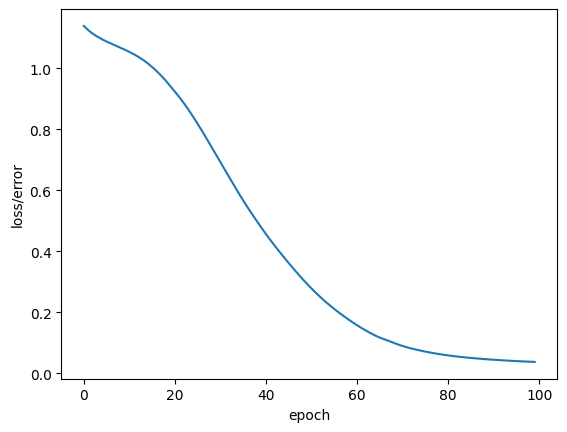

In [119]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [120]:
# evaluate model on test dataset
with torch.no_grad(): # turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # find the loss/error



In [121]:
loss

tensor(0.1285)

In [130]:
# that's pretty bad, lets see why

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not?
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'we got {correct} correct')


1.) tensor([0.0000, 8.1530, 5.2579]) 	 1 	 1
2.) tensor([ 0.0000, 11.7036,  4.3318]) 	 1 	 1
3.) tensor([ 0.0000, 12.3884,  5.5845]) 	 1 	 1
4.) tensor([0.0000, 3.2486, 7.5142]) 	 2 	 2
5.) tensor([ 0.0000, 10.0307,  5.5443]) 	 1 	 1
6.) tensor([0.6256, 0.6437, 8.6466]) 	 2 	 2
7.) tensor([0.0000, 7.3995, 6.0628]) 	 1 	 1
8.) tensor([0.0000, 2.8660, 7.6466]) 	 2 	 2
9.) tensor([0.0000, 8.6174, 5.8041]) 	 1 	 1
10.) tensor([ 0.0000, 12.3059,  4.5769]) 	 1 	 1
11.) tensor([0.0000, 6.8030, 6.0817]) 	 1 	 1
12.) tensor([16.3346,  0.0000,  9.0317]) 	 0 	 0
13.) tensor([14.8130,  0.0000,  8.1090]) 	 0 	 0
14.) tensor([2.0973, 0.0000, 7.8129]) 	 2 	 2
15.) tensor([14.5093,  0.0000,  9.0034]) 	 0 	 0
16.) tensor([0.0000, 6.3075, 6.3966]) 	 1 	 2
17.) tensor([14.9137,  0.0000,  8.5582]) 	 0 	 0
18.) tensor([0.0000, 7.6368, 5.5019]) 	 2 	 1
19.) tensor([15.7059,  0.0000,  8.7107]) 	 0 	 0
20.) tensor([13.3451,  0.0000,  8.1695]) 	 0 	 0
21.) tensor([1.4422, 0.0000, 8.1336]) 	 2 	 2
22.) tensor([